# Loan Data from Prosper Exploration
## by Ahmed Sayed

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading the dataset
df = pd.read_csv('prosperLoanData.csv')

In [3]:
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The Dataset contains 113,937 loans with 81 variables on each loan. Variables are integers, floats and strings, including LoanStatus, LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others.

### What is/are the main feature(s) of interest in your dataset?

> Actually a lot of variables and informaton that might allow me to have a good chance to look deeper at factors that affect the 
the current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features, will help me into invstigation
  >> - ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.
  >> - ListingCreationDate: The date the listing was created.
   >>- Term: The length of the loan expressed in months.
   >>- LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
   >>- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
  >> - BorrowerRate: The Borrower's interest rate for this loan. 
   >>- BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
   >>- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
   >>- ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1  Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
   >>- EmploymentStatus: The employment status of the borrower at the time they posted the listing.
   >>- MonthlyLoanPayment: The scheduled monthly loan payment.
   >>- LoanOriginalAmount: The origination amount of the loan.

In [6]:
# Selecting features of interest
interest_cols = ['ListingNumber','ListingCreationDate','Term','LoanStatus','BorrowerAPR','BorrowerRate','BorrowerState','ProsperScore',
                'ListingCategory (numeric)','EmploymentStatus','MonthlyLoanPayment','LoanOriginalAmount'] 
df_interest = df[interest_cols]

In [7]:
df_interest.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,BorrowerState,ProsperScore,ListingCategory (numeric),EmploymentStatus,MonthlyLoanPayment,LoanOriginalAmount
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,CO,NaN,0,Self-employed,330.43,9425
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,CO,7.0,2,Employed,318.93,10000
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,GA,NaN,0,Not available,123.32,3001
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,GA,9.0,16,Employed,321.45,10000
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,MN,4.0,2,Employed,563.97,15000


In [8]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   BorrowerState              108422 non-null  object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  MonthlyLoanPayment         113937 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 10.4+ MB


## Univariate Exploration

   > Let's start investigating the distributions of individual variables of interest
          >>- LoanStatus
          >>- BorrowerRate               
           >>- ProsperScore               
       >>- EmploymentStatus
       >>-MonthlyLoanPayment
       >>- LoanOriginalAmount         

#### How does the loan status vary along the data set?

In [9]:
# Getting overview over LoanStatus
df_interest.LoanStatus.describe()

count      113937
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object

In [10]:
df_interest.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

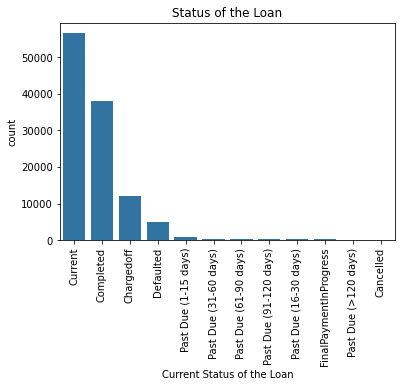

In [11]:
# Plotting the bar chart of LoanStatus in order
base_color = sb.color_palette()[0]
sb.countplot(data = df_interest, x = 'LoanStatus', color = base_color, order = df_interest['LoanStatus'].value_counts().index )
plt.title('Status of the Loan')
plt.xlabel('Current Status of the Loan')
plt.xticks(rotation = 90);

Most of the loans are current or completed and few number of loans that are charged off, defaulted or past due.

#### Do borrowers get lower interest rate?

In [12]:
# Getting overview over BorrowerRate
df_interest.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

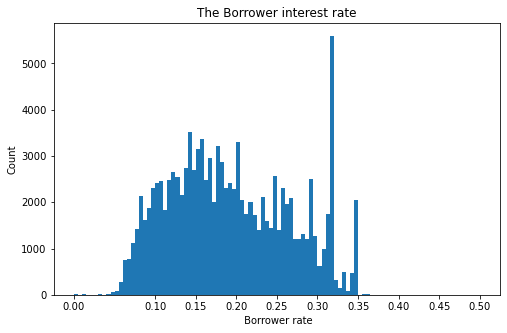

In [13]:
# Plotting the Histogram for BorrowerRate(continous variable)
binsize = 0.005
bins = np.arange(df_interest.BorrowerRate.min(), df_interest.BorrowerRate.max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_interest, x = 'BorrowerRate', bins = bins)
plt.title('The Borrower interest rate')
plt.xlabel(' Borrower rate')
plt.ylabel('Count')
plt.xticks([0.0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plt.show();

The histogram shows that the most of the borrowers have an interest rate between of 0.1 and 0.3.

#### Do borrowers get least risky score rate?

In [14]:
# Getting overview over ProsperScore
df_interest.ProsperScore.describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

In [15]:
df_interest.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [16]:
# Since The score ranges from 1-10 but there is data with score of 11
df_interest = df_interest[df_interest['ProsperScore'] != 11]

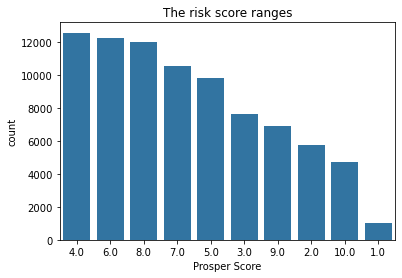

In [17]:
# Plotting the bar chart of ProsperScore in order
base_color = sb.color_palette()[0]
sb.countplot(data = df_interest, x = 'ProsperScore', color = base_color, order = df_interest['ProsperScore'].value_counts().index )
plt.title('The risk score ranges')
plt.xlabel('Prosper Score');

The bar chart shows that the most of the borrower have low Prosper Score of 4 and the majority of the customer have a score between 5-8 and not many borrowers received the highest score of 10.

#### Who can get a loan?

In [18]:
# Getting overview over EmploymentStatus
df_interest.EmploymentStatus.describe()

count       110226
unique           8
top       Employed
freq         65957
Name: EmploymentStatus, dtype: object

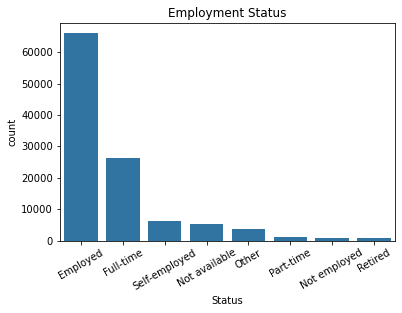

In [19]:
# Plotting the bar chart of EmploymentStatus in order
base_color = sb.color_palette()[0]
sb.countplot(data = df_interest, x = 'EmploymentStatus', color = base_color, order = df_interest['EmploymentStatus'].value_counts().index )
plt.title('Employment Status')
plt.xlabel('Status')
plt.xticks(rotation=30);

The bar chart shows that most of the borrowers employed and the data shows that you can get a loan even you are unemployed or retired person.

#### Do borrowers pay a lot of money monthly?

In [20]:
# Getting overview over MonthlyLoanPayment
df_interest.MonthlyLoanPayment.describe()

count    112481.000000
mean        270.513906
std         191.234362
min           0.000000
25%         130.760000
50%         215.990000
75%         369.040000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

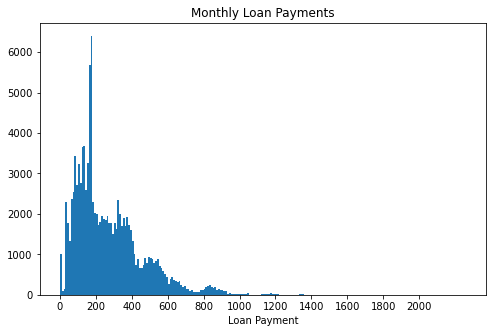

In [21]:
# Plotting the Histogram for MonthlyLoanPayment(continous variable)
binsize = 10
bins = np.arange(df_interest.MonthlyLoanPayment.min(), df_interest.MonthlyLoanPayment.max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_interest, x = 'MonthlyLoanPayment', bins = bins)
plt.title('Monthly Loan Payments')
plt.xlabel('Loan Payment')
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000])
plt.show();

The Histogram shows that lot of loans is with small montly payments

#### How much loan amount can borrowers get?

In [22]:
# Getting overview over LoanOriginalAmount
df_interest.LoanOriginalAmount.describe()

count    112481.000000
mean       8252.601133
std        6172.040285
min        1000.000000
25%        4000.000000
50%        6001.000000
75%       11500.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


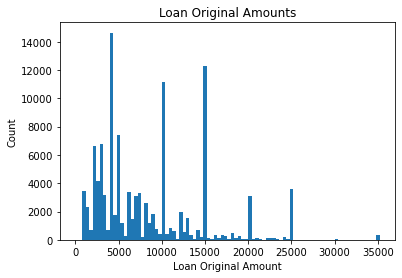

In [23]:
binsize = 400
bins = np.arange(0, df_interest.LoanOriginalAmount.max()+binsize, binsize)
sb.distplot(df_interest['LoanOriginalAmount'], bins = bins, kde = False,hist_kws = {'alpha' : 1})
plt.title('Loan Original Amounts')
plt.xlabel('Loan Original Amount')
plt.ylabel('Count');

The histogram shows that the most loane amount is about 4000 then 15000 and most of the values are between 2500 and 10,000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Most of the loans status are current or completed, most of the borrowers have an interest rate between of 0.1 and 0.3, most of the borrowers are employed, lot of loans is with small montly payments.
> Although most of the borrowers are employed but there are unemployed persons which also could get a loan, I think these were employed and somehow they have become unemployed and they have to pay Monthly Loan Payment so no need to perform any transformations.    

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I have found in ProsperScore there is data with score 11 since the score ranges from 1-10 so I removed these score dataset

## Bivariate Exploration


Since I am interested in looking deeper at factors that affect the the current status of the loan (Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue) so I am going to plot the variables of interest against the current status of the loan using a boxplot 

#### How does borrower loan status vary for different loan interest rate?

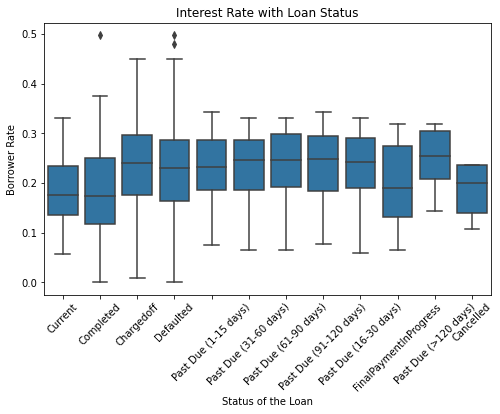

In [24]:
# Plotting the Boxplot BorrowerRate against LoanStatus
plt.figure(figsize=[8, 5])
sb.boxplot(data = df_interest, x = 'LoanStatus', y = 'BorrowerRate', color = base_color, order = df_interest['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Interest Rate with Loan Status')
plt.xlabel('Status of the Loan')
plt.ylabel('Borrower Rate');

The plot shows that the highest Borrower Rate are asscociated with loans that are charged-off and with loans that have past due payments

#### How does borrower loan status vary for different loan risk score rate?

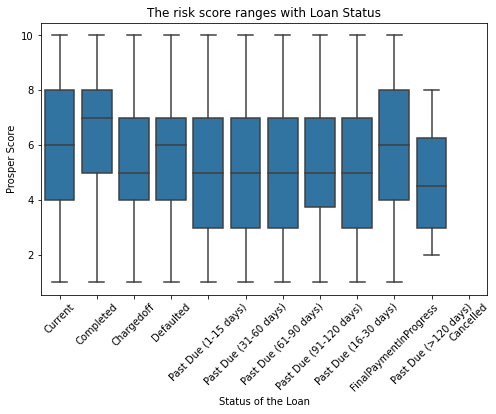

In [25]:
# Plotting the Boxplot ProsperScore against LoanStatus
plt.figure(figsize=[8, 5])
sb.boxplot(data = df_interest, x = 'LoanStatus', y = 'ProsperScore', color = base_color, order = df_interest['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.title('The risk score ranges with Loan Status')
plt.xlabel('Status of the Loan')
plt.ylabel('Prosper Score');

The plot shows that the highest Prosper Score when a loan is completed

#### How does borrower loan status vary for different Employment Status?

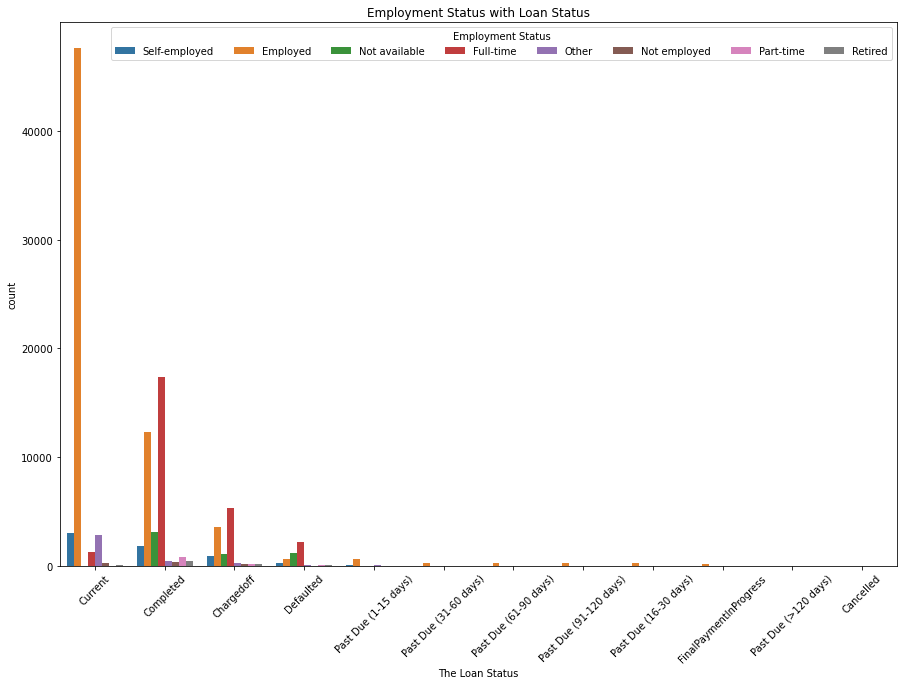

In [26]:
# Plotting EmploymentStatus against LoanStatus
plt.figure(figsize = [15,10])
sb.countplot(data = df_interest, x = 'LoanStatus', hue = 'EmploymentStatus', order = df_interest['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Employment Status')
plt.xticks(rotation = 45)
plt.title('Employment Status with Loan Status')
plt.xlabel('The Loan Status');

The plot shows that the employment status  has no impact on the loan outcome.

#### How does borrower loan status vary for different Monthly Payment?

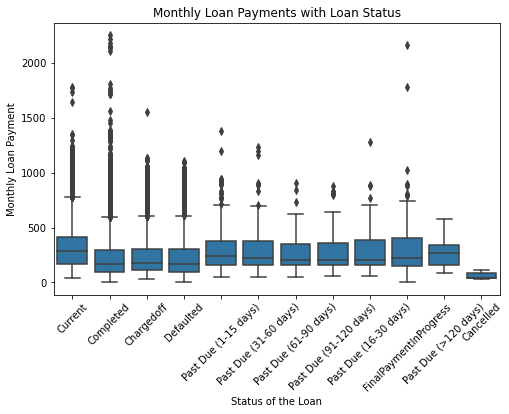

In [27]:
# Plotting the Boxplot Monthly Loan Payment against LoanStatus
plt.figure(figsize=[8, 5])
sb.boxplot(data = df_interest, x = 'LoanStatus', y = 'MonthlyLoanPayment', color = base_color, order = df_interest['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Monthly Loan Payments with Loan Status')
plt.xlabel('Status of the Loan')
plt.ylabel('Monthly Loan Payment');

The plot shows that the loans with current status have in average a higher Monthly Loan Payment.

#### How does borrower loan status vary for different Loan Amount?

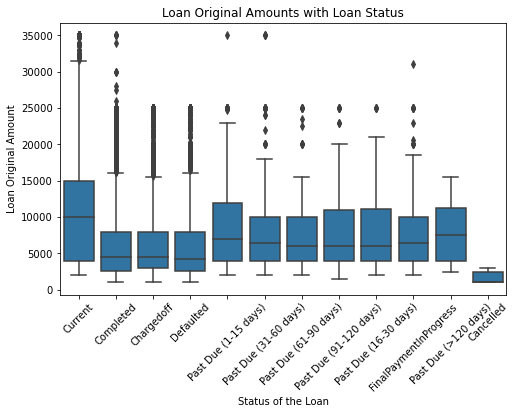

In [28]:
# Plotting the Boxplot Loan Original Amount against LoanStatus
plt.figure(figsize=[8, 5])
sb.boxplot(data = df_interest, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color, order = df_interest['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Loan Original Amounts with Loan Status')
plt.xlabel('Status of the Loan')
plt.ylabel('Loan Original Amount');

The plot shows that the loans with current status have in average a higher orginal loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have observed that the highest Borrower Rate are asscociated with loans that are charged-off, the highest Prosper Score when a loan is completed, the employment status has no impact on the loan outcome, the loans with current status have in average a higher Monthly Loan Payment, the loans with current status have in average a higher orginal loan amount.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan original amount is positively correlated with the monthly loan payment, it makes sense since borrowers with more monthly loan payment are with more loan original amount.

## Multivariate Exploration

> Since Borrower Rate and Monthly Loan Payment have strong impact on the outcome of a loan and Prosper Score so I am going to investigate the relationship between them

#### How does borrower risk score rate vary for different Loan Interest rate and status?

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


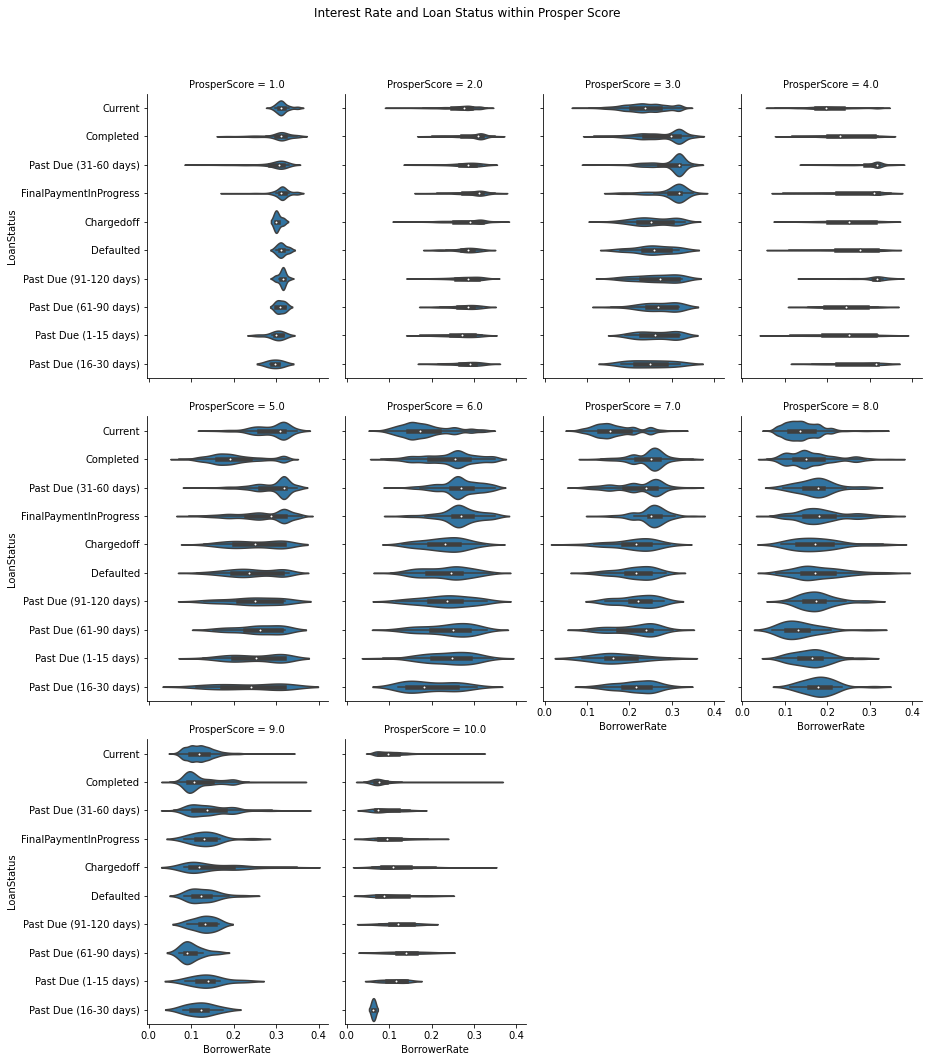

In [29]:
g=sb.FacetGrid(data= df_interest, aspect=0.65, height=5, margin_titles=True, col='ProsperScore', col_wrap=4)
g.map(sb.violinplot, 'BorrowerRate', 'LoanStatus')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Interest Rate and Loan Status within Prosper Score')
g.add_legend();

The plots show the higher the Prosper Score, the lower the interest rate, so borrower with a low Prosper Score get a higher interest rate and the higher Prosper Score when a loan is completed.

#### How does borrower risk score rate vary for different Loan Monthly Payment and status?

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


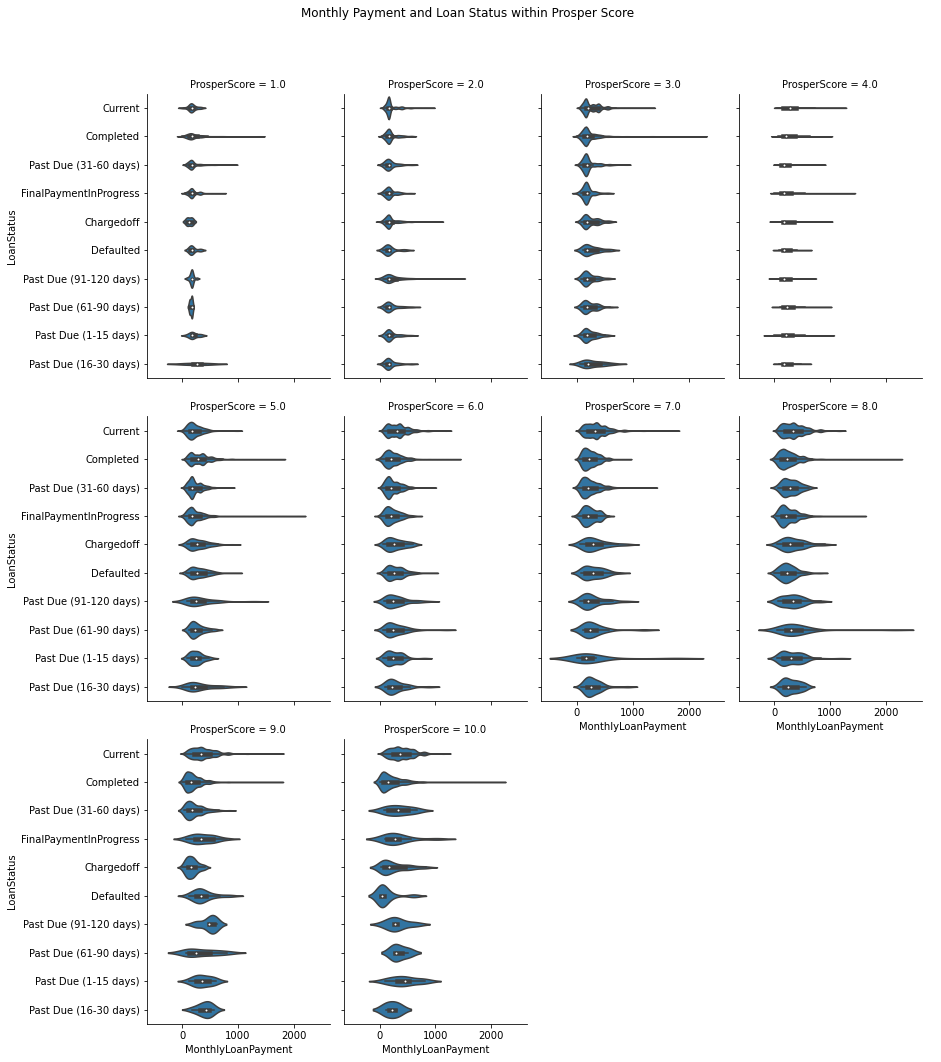

In [30]:
g=sb.FacetGrid(data= df_interest, aspect=0.65, height=5, margin_titles=True, col='ProsperScore', col_wrap=4)
g.map(sb.violinplot, 'MonthlyLoanPayment', 'LoanStatus')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Payment and Loan Status within Prosper Score') 
g.add_legend();

The plots show that borrowers with a high Prosper score have higher monthly payments and higher monthly loan payments are more common in loans that are current.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this multivariate analysis, I have found the higher the Prosper Score, the lower the interest rate when a loan is completed and borrowers with a high Prosper score have higher monthly payments when loans are current.

### Were there any interesting or surprising interactions between features?

> The interactions are interesting and expected by the fact that people with higher Prosper Score have higher income and therefore higher monthly payments.